# CC5215: Privacidad de Datos
## Proyecto grupal - Entregable 2

## Miembros del grupo

Ingrese los nombres de lxs miembros del grupo. Recuerde que el grupo debe tener un máximo de 3 miembros y la constitución del grupo **no se puede cambiar** a lo largo de los distintos entregables.

*   Miembro 1: Diego Pizarro
*   Miembro 2: Jorge Barraza
*   Miembro 3: Romina Rodríguez


## Objetivo general
El objetivo de esta primera parte del trabajo grupal es que apliquen técnicas de privacidad diferencial para publicar la mayor información posible, intentando encontrar el buen trade-off entre privacidad y utilidad.

## Reglas

* El documento debe ser **autocontenido** y debe explicar para cada atributo si es númerico o categórico.
* En esta entrega se eevaluarán minuciosamente los razonamientos seguidos, y los argumentos detrás de ellos. Justifique lo mejor que pueda cada paso de sus análisis.
* Con el fin de poder evaluar objetivamente sus resultados, su entrega debe indicar **todos** los pasos que siguió (incluyendo los "malos" pasos), especialmente del código.
* Siéntase libre de agregar bloques de código o texto según los necesite. Sin embargo, se le recomienda mantener un mínimo orden en su entrega final.



## P0 (5 puntos)

Cargue su dataset, listo para usarse, y describa cada columna (que vaya a usar), indicando si el atributo es numérico o categórico. Elimine, si corresponde, todas las columnas que no vaya a usar en su entrega.

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
import warnings
import random
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Complete acá su código
dataset = pd.read_csv('https://raw.githubusercontent.com/dpizarrow/CC5215-Project/main/Juvenile_Arrests.csv?token=GHSAT0AAAAAAB2DIKKZXN6YFQNBSSKJYWYCZBTNAOA')

In [2]:
# Utils

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def gaussian_mech(v, sensitivity, epsilon, delta):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    return v + np.random.normal(loc=0, scale=sigma)


Limpie el dataset, eliminando las columnas que no sean de interés para este trabajo grupal, los registros que estén incompletos (con e.g. nan o null en alguna de sus celdas) y, en caso de que sea necesario, formateando (correcta y uniformemente) las celdas que presenten problemas.

In [3]:
dataset.columns

Index(['Record Count', 'Month/Year', 'Incident ID', 'Agency Code', 'Charge',
       'Date Arrested', 'Time Arrested', 'Age', 'Race', 'Sex', 'Ethnicity',
       'Reisdence', 'Case Nummber', 'GeoX', 'GeoY', 'Arrest Type',
       'Arrest Description', 'Tract', 'Tract Description', 'Zone',
       'Zone Description', 'District', 'District Description', 'Report Area',
       'Report Area Description', 'Neighborhood', 'Neighborhood Description',
       'Sub-division', 'Sub-division Description', 'Drug/Alchohol', 'Weapon',
       'Weapon Description', 'Disposition', 'Disposition Description',
       'Street Direction', 'Street', 'City', 'State', 'Zip Code',
       'GeoReference', 'FLPD Police Districts', 'Neighborhood Associations',
       'City Commission Districts - 2020', 'Police Districts - 2020',
       'Neighborhood Associations - 2020'],
      dtype='object')

In [4]:
len(dataset)

2938

In [5]:
cols_to_keep = [
    'Charge',
    'Date Arrested',
    'Age',
    'Race',
    'Sex',
    'Arrest Description',
    'Disposition Description',
    'Zip Code',
]

In [6]:
dataset = dataset[cols_to_keep]

In [7]:
# Se eliminan los valores nulos
dataset = dataset.dropna()

In [8]:
dataset = dataset.reset_index(drop = True)

In [9]:
type(dataset['Date Arrested'])

pandas.core.series.Series

In [10]:
dataset

,Charge,Date Arrested,Age,Race,Sex,Arrest Description,Disposition Description,Zip Code
0,BURGL-CONVEYANCE UNOCCUPIED/UNARMED,07/01/2017 12:00:00 AM,14.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33301.0
1,BATTERY-TOUCH OR STRIKE,06/04/2019 12:00:00 AM,14.0,B,M,OUT OF CUSTODY,CAPIAS REQUEST,33064.0
2,BATTERY-ON OFFICER FIREFIGHTER EMT ETC,10/28/2015 12:00:00 AM,16.0,B,F,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
3,RESIST OFFICER-WITH VIOLENCE F,05/11/2015 12:00:00 AM,16.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
4,BURGL-STRUCTURE UNOCCUPIED/UNARMED,01/16/2018 12:00:00 AM,17.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33312.0
...,...,...,...,...,...,...,...,...
2595,ROBBERY-CARJACKING WITHOUT FIREARM OR WEAPON,09/02/2016 12:00:00 AM,16.0,B,M,OUT OF CUSTODY,CAPIAS REQUEST,33304.0
2596,ACTIVE WARRANT-FALSE IMPRISONMENT-NO BOND,09/19/2019 12:00:00 AM,17.0,W,F,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33312.0
2597,ROBBERY-NO FIREARM OR WEAPON,08/31/2015 12:00:00 AM,15.0,B,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33311.0
2598,LARC-GRAND THEFT 300 LESS THAN 5K DOLS,07/01/2016 12:00:00 AM,17.0,W,M,PHYSICAL / IN CUSTODY,CLEARED BY ARREST,33304.0


In [11]:
# Se verifica que no existan nulos
dataset.isna().sum()

Charge                     0
Date Arrested              0
Age                        0
Race                       0
Sex                        0
Arrest Description         0
Disposition Description    0
Zip Code                   0
dtype: int64

In [12]:
len(dataset)

2600

Describa coloquialmente los datos que contiene el dataset (de dónde fueron obtenidos, qué representa cada columna, etc.)

> El dataset corresponde a arrestos de juveniles en la ciudad de Fort Lauderdale, Florida, EEUU. Contine 2600 datos de arrestos luego de la limpieza del dataset. Estos datos fueron obtenidos de la pagina [Fort Lauderdale Police Department - Open Data Portal](https://fortlauderdale.data.socrata.com/Police/Juvenile-Arrests/5tgj-en5g), y la ultima actualización fue el año 2020. \\

> Las columnas resultantes posterior a la limpieza son:
  - Charge (categórico): Motivo del arresto
  - Date Arrested (numérico): Fecha del arresto
  - Age (numérico): Edad de la persona arrestada
  - Race (categórico): Raza de la persona arrestada
  - Arrest Description (categórico): Descripción del arresto
  - Zip Code (numérico): Código postal de la persona arrestada
  - Disposition Description (categórico): Resultado o última actualización del arresto

## P1 (10 puntos)

Entregue una tabla de contingencia que considere **multiples** columnas y argumente porque podría ser útil para un analista. Por ejemplo, considere que publicar una tabla de contingencia de un solo atributo no es muy útil.

In [13]:
tabla = pd.crosstab([dataset['Charge'], dataset['Disposition Description']], dataset['Age'], margins = True)
tabla

,Age,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,All
Charge,Disposition Description,,,,,,,,,,,
**365.172-14** -MISUSE 911 OR E911 SYSTEM COST OVER 100,CLEARED BY ARREST,0,0,0,0,0,0,1,0,0,0,1
-PICK UP ORDER FOR BURGLARY CONV/ UN OCCP,CLEARED BY ARREST,0,0,0,0,0,0,0,1,0,0,1
16-1 DISORDERLY CONDUCT-ENGAGE IN FIGHTING M,CLEARED BY ARREST,0,0,0,0,0,0,0,0,1,0,1
ABUSE CHILD WITHOUT GREAT BODILY HARM,CLEARED BY ARREST,0,0,0,0,0,0,0,1,0,0,1
ACT JUVE PICKUP ORDER CT 1 PETIT THEFT NO BOND,CLEARED BY ARREST,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
WARRANT: BURGLARY DWELL (NO BOND),CLEARED BY ARREST,0,0,0,0,0,0,0,1,0,0,1
WEAPON OFFENSE-EXHIBIT FA DESTR DEVIC WPN SCH PROP/WI 1000 F,CLEARED BY ARREST,0,0,0,0,1,0,0,0,0,0,1
WEAPON OFFENSE-MISSILE INTO DWELLING VEH BUILDING OR AIRCRAF,CLEARED BY ARREST,0,0,0,0,0,0,1,1,0,0,2


Esta tabla de contingencia nos muestra el cargo y el resultado del arresto para cada edad en el dataset. Esta tabla podría ser útil para un analista, desde el punto de vista eden querer saber cuáles y cuántos son los crímenes que son cometidos por cada edad en el dataset, además de saber cuál fue el resultado posterior al arresto.

## P2 (12 puntos)

Defina al menos 3 consultas, de suficiente complejidad, para realizar sobre su dataset. Describa las consultas en lenguaje natural, argumentando por qué dichas consultas son útiles o de interés. Luego escriba el código para realizarlas (sin preservar privacidad).

1. Reportar los 5 delitos más comúnes: Esta consulta nos permite saber qué tipo de crimenes son más comunmente cometidos por niños/as menores de edad en el dataset, lo que resulta de interés pues puede llevar a un posterior estudio de cómo mejorar la situación y disminuir esos tipos de crimenes en específico. También, este tipo de consulta nos permitirá reportar el noisy max.
2. Obtener el promedio de edad de las personas en la tabla: Obteniendo el promedio de las edades de los menores de edad en la tabla podemos recuperar información útil acerca de la edad que poseen la mayoría de los chicos/as que cometen crimenes, y saber también qué tan cercano es dicho número a la mayoría de edad. Con este tipo de consulta se puede aplicar SVT y Composición Secuencial.
3. Reportar el conteo de cantidad de delitos según edad/temporada que tenga gran cardinalidad para utilizar Gauss: Con esta consulta podemos ver en qué edad se concentra la mayor cantidad de menores de edad que cometen crimenes, con lo que podemos ver lo que ocurre con la cantidad de crimenes cometidos a medida que aumenta la edad. Al ser conteos de alta cardinalidad podemos también aplicar Gauss.

In [14]:
# 1
def report_top_five_charges():
  values_series = dataset['Charge'].value_counts()[:5].sort_values(ascending=True)
  values_array = [(value, index) for index, value in values_series.iteritems()]
  return values_array
print("Top 5 de delitos más comúnes cometidos:\n", report_top_five_charges())

# 2
print("\nPromedio de edad de los individuos: ", dataset['Age'].mean())

# 3
print("\nConteo de delitos según edad:\n", dataset.groupby(['Age']).size().reset_index(name='counts'))

Top 5 de delitos más comúnes cometidos:
 [(76, 'BURGL-STRUCTURE UNOCCUPIED/UNARMED'), (160, 'RESIST OFFICER-OBSTRUCT WO VIOLENCE'), (171, 'BURGL-DWELLING UNOCCUPIED/UNARMED'), (175, 'BURGL-CONVEYANCE UNOCCUPIED/UNARMED'), (264, 'VEH THEFT-GRAND THEFT OF MOTOR VEHICLE')]

Promedio de edad de los individuos:  15.339615384615385

Conteo de delitos según edad:
     Age  counts
0   8.0       1
1   9.0       1
2  10.0       3
3  11.0      30
4  12.0      82
5  13.0     195
6  14.0     384
7  15.0     558
8  16.0     641
9  17.0     705


## P3 (9 puntos)

Para cada consulta, identifique una noción de métrica de *utilidad* (precisión) que usted considere razonable. Luego implemente las funciones necesarias para medir utilidad.

> Dado que todas las consultas a implementar retornan resultados numéricos, una métrica razonable para para medir la utilidad es la comparación entre el valor original y el resultado de la consulta diferencialmente privada. Para esto se puede hacer uso del error porcentual.

> Además, para la consulta en la que se utilizará el mecanismo Gaussiano, se define una función que retorna el error porcentual de cada query del mecanismo además del promedio de los errores porcentuales del mecanismo completo.


In [15]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

def error_data(real_answers, noisy_answers):
  errors = [pct_error(real_a, noisy_a) for (real_a, noisy_a) in zip(real_answers, noisy_answers)]
  avg_error = np.mean(errors)
  return errors, avg_error

## P4 (12 puntos)

Describa como planea realizar sus consultas de manera diferencialmente privada, incluyendo tanto los mecanismos a usar como la estrategia del uso de budgets de privacidad. Para atributos numéricos, plantéese publicar sumas, máximos, promedios, etc. Al menos, utilice el macanismo de Laplace y SVT. Para datos categóricos, plantéese utilizar el Mecanismo Exponencial o Report Noisy Max.

Luego, implemente sus consultas diferencialmente privadas.

## Consulta 1: 5 Delitos mas Comunes

> La primera consulta a implementar es para reportar los 5 delitos más comunes en el dataset. Dado que se están trabajando con atributos nuéericos en este caso, la idea es implementar el mecanismo de Report Noisy Max consecutivamente, de modo que la consulta utiliza en total un costo de privacidad $\epsilon$ dado.

In [16]:
# 1 DP
def score(option):
    return dataset[dataset['Charge'] == option].shape[0]

def report_noisy_max(R, score, sensitivity, epsilon):
    scores = [score(elem) for elem in R]

    noisy_scores = [laplace_mech(s, sensitivity, epsilon) for s in scores]

    max_idx = np.argmax(noisy_scores)

    return (np.max(noisy_scores), R[max_idx])

options = dataset['Charge'].unique()

def dp_report_top_five_charges(options, sensitivity, epsilon):
  epsilon_frac = epsilon/5
  charges = []
  charges.append(report_noisy_max(options, score, sensitivity, epsilon_frac))
  for i in range(4):
    options = np.delete(options, np.where(options == charges[-1][1]))
    charges.append(report_noisy_max(options, score, sensitivity, epsilon_frac))
  return sorted(charges, key=lambda x: x[0])

dp_report_top_five_charges(options, 1, 1)


[(83.33232298592303, 'BATTERY-TOUCH OR STRIKE'),
 (163.0930321863993, 'RESIST OFFICER-OBSTRUCT WO VIOLENCE'),
 (174.49131353448007, 'BURGL-CONVEYANCE UNOCCUPIED/UNARMED'),
 (176.1137432582564, 'BURGL-DWELLING UNOCCUPIED/UNARMED'),
 (242.38760869117743, 'VEH THEFT-GRAND THEFT OF MOTOR VEHICLE')]

## Consulta 2: Promedio de edades del dataset

> Esta consulta tiene como objetivo publicar de manera $\epsilon$ diferencialmente privada el promedio de las edades de todos los individuos del dataset. Para ello, se utilizarán dos métodos. El primer método utiliza composición secuencial para calcular una suma y conteo rudioso, para luego liberar su división. Este método es factible ya que como estamos trabajando con un dataset de niños, el parámetro de clipping sobre las edades es conocido fácilmente (17). El segundo método utiliza SVT, para primero calcular un parámetro de clipping adecuado, y luego liberar el promedio. En ambos casos se tiene que estos métodos son $\epsilon$ diferencialmente privados.

In [17]:
# Promedio de edades usando Composicion Secuencial

def avg_seq(data, epsilon):

    epsilon_count = epsilon / 2
    epsilon_sum = epsilon / 2

    num = laplace_mech(data.clip(lower=0, upper=17).sum(), 17, epsilon_sum)
    den = laplace_mech(len(data), 1, epsilon_count)

    return num / den

print(avg_seq(dataset['Age'], 1))

15.341469022969418


In [18]:
def above_threshold(queries, df, T, epsilon):
  T_hat = T + np.random.laplace(loc=0, scale = 2/epsilon)
  for idx, q in enumerate(queries):
    nu_i = np.random.laplace(loc=0, scale = 4/epsilon)
    if q(df) + nu_i >= T_hat:
      return idx
  return None

In [19]:
# Promedio de edades usando SVT

def auto_avg(df, epsilon):
  def create_query(b):
    return lambda df: df.clip(lower=0, upper=b).sum() - df.clip(lower=0, upper=b + 1).sum()
  # Construct the stream of queries
  bs = range(1, 20, 2)
  queries = [create_query(b) for b in bs]
  # Run AboveThreshold, using 1/3 of the privacy budget, to find a good clipping parameter
  epsilon_svt = epsilon / 3
  try:
    final_b = bs[above_threshold(queries, df, 0, epsilon_svt)]
  except:
    return auto_avg(df, epsilon)
  # Compute the noisy sum and noisy count, using 1/3 of the privacy budget for each
  epsilon_sum = epsilon / 3
  epsilon_count = epsilon / 3
  noisy_sum = laplace_mech(df.clip(lower=0, upper=final_b).sum(), final_b, epsilon_sum)
  noisy_count = laplace_mech(len(df), 1, epsilon_count)
  return noisy_sum / noisy_count

auto_avg(dataset['Age'], 1)

15.390502228633494

## Consulta 3: Conteo de crimenes por edad

Este mecanismo busca liberar el conteo de crimenes por edad, utilizando el mecanismo Gaussiano para obtener $(\epsilon, \delta)$ privacidad diferencial.

In [20]:
def count_query(dataset, age):
    return len(dataset[dataset['Age'] == age])

def gaussian_vec(range_age, epsilon, delta):
    answers = []
    ages = [i for i in range(range_age[0], range_age[1]+1)]
    sens = np.sqrt(len(ages))
    for i in ages:
      original_answer = count_query(dataset, i)
      answer = gaussian_mech(original_answer, sens, epsilon, delta)
      answer = max(0, answer)
      answers.append(answer)
    return answers

print('Answers:', gaussian_vec([7,17], 1.0, 1e-5))

Answers: [0, 0, 37.78564623442359, 0, 49.918738022793484, 88.00165559746135, 202.72488373581245, 387.05791348157925, 539.0069943956833, 642.5115483250374, 691.0203071717398]


## P5 (9 puntos)

Pruebe distintos epsilons (e.g. $\epsilon = \{0.01, 0.1, 1, \dots, 20\} $) para encontrar un buen trade-off entre privacidad y útilidad (precisión). Proponga un "buen" epsilon para cada analisis. Argumente sus decisiones.

Finalmente, indique el epsilon total requerido en el total de su análisis.

> # Consulta 1: 5 Delitos mas Comunes

Comparaciones entre valor real y valor con ruido para el top 5 de crimenes cometidos y distintos budgets de privacidad


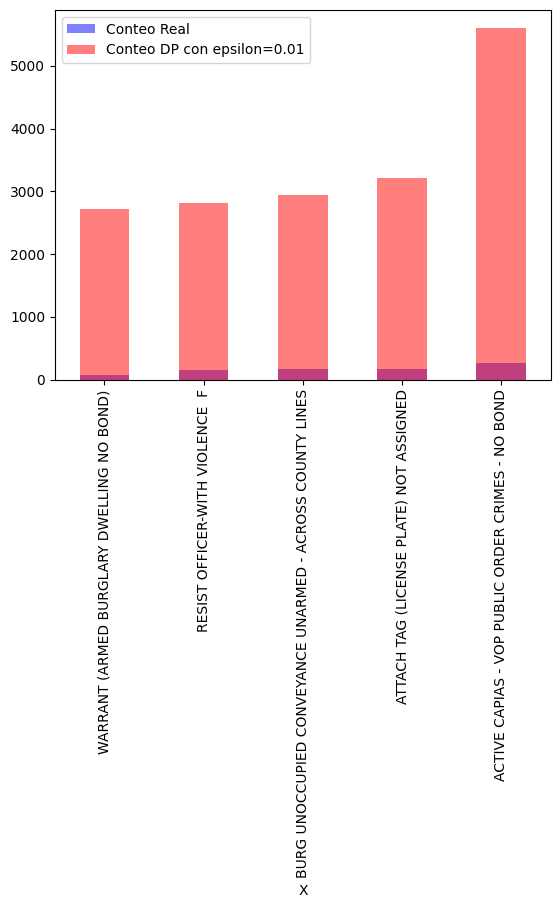

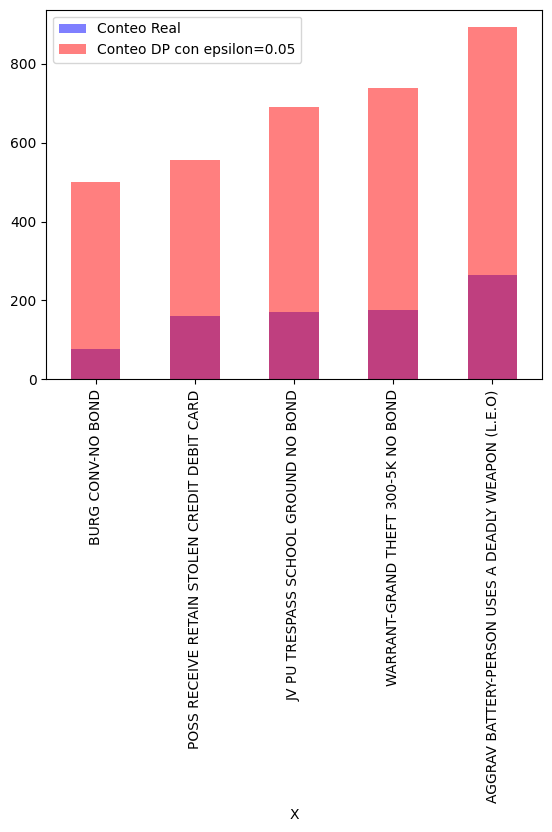

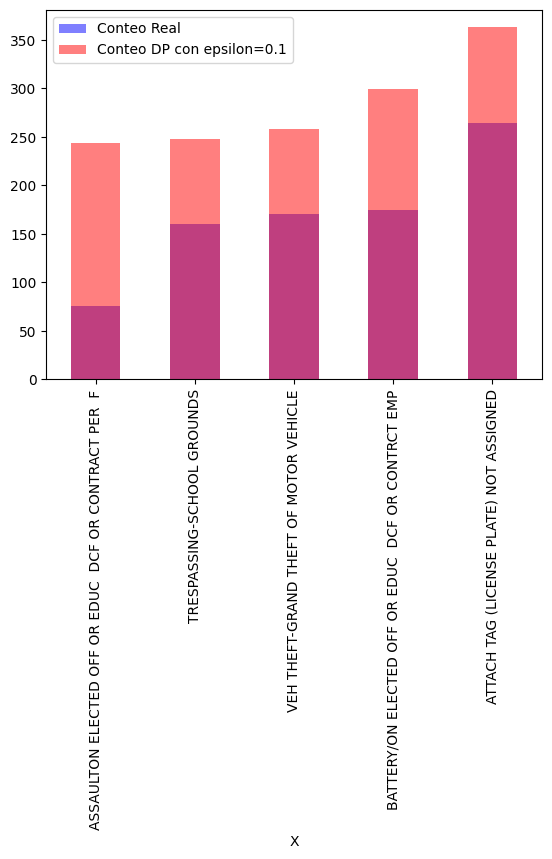

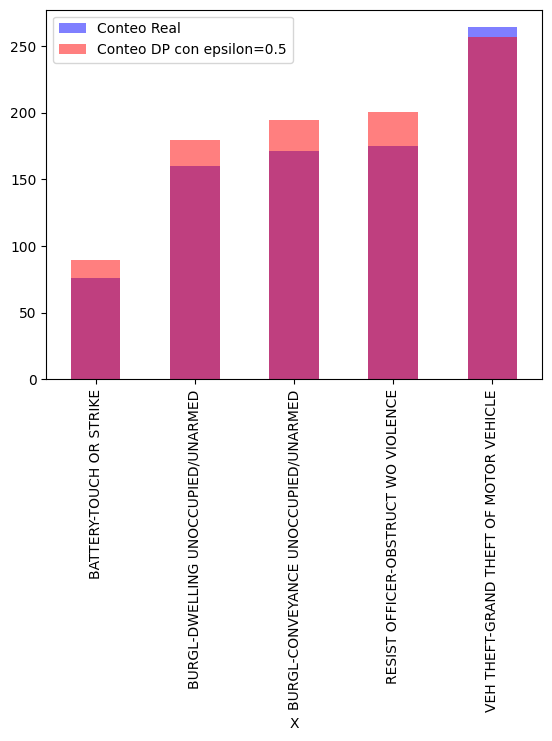

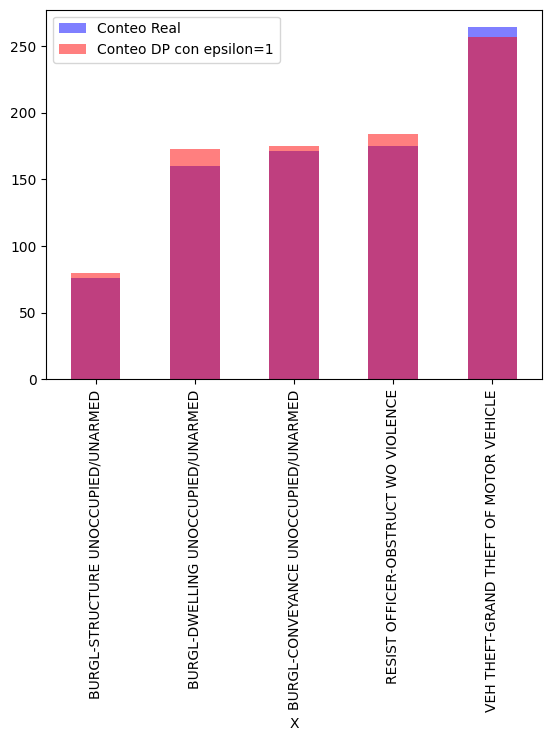

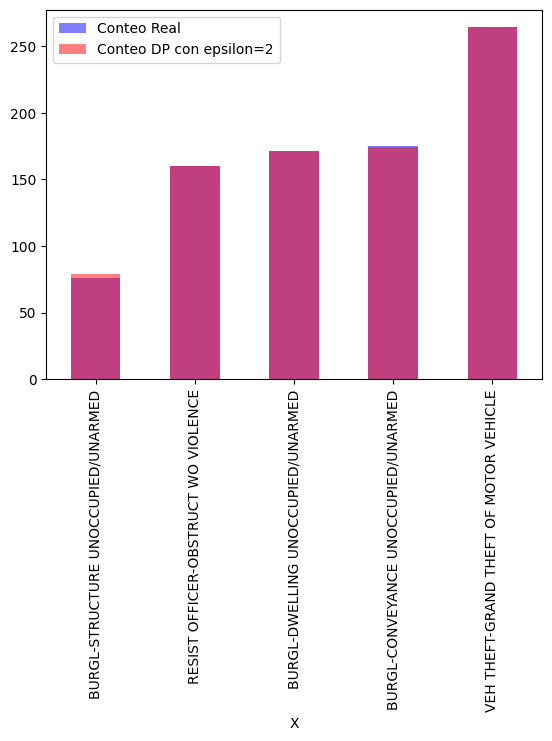

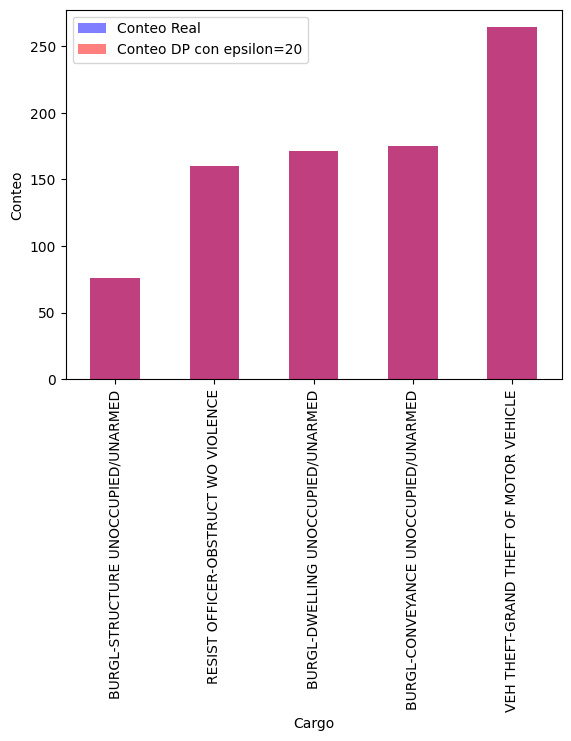

In [21]:
def hist_top_five_charges():
    epsilons = [0.01, 0.05, 0.1, 0.5, 1, 2, 20]
    options = dataset['Charge'].unique()
    real_data = report_top_five_charges()
    df_normal = pd.DataFrame(report_top_five_charges(), columns=['Y', 'X'])
    for epsilon in epsilons:
      data_dp = dp_report_top_five_charges(options, 1, epsilon)
      df_dp = pd.DataFrame(data_dp, columns=['Y', 'X'])
      ax = df_normal.plot(x='X', y='Y', label=f'Conteo Real', color='blue', kind='bar', alpha=0.5)
      df_dp.plot(x='X', y='Y', label=f'Conteo DP con epsilon={epsilon}', color='red', kind='bar', alpha=0.5, ax=ax)
    plt.xlabel('Cargo')
    plt.ylabel('Conteo')

print("Comparaciones entre valor real y valor con ruido para el top 5 de crimenes cometidos y distintos budgets de privacidad")
hist_top_five_charges()

> El epsilon usado al generar cada gráfico mostrado fue el epsilon de la lista [0.01, 0.05, 0.1, 0.5, 1, 2, 20] dada, ya que que la función dp_report_top_five_charges declarada utiliza sólo el epsilon dado para encontrar el top 5 de cargos con ruido. Es evidente ver que el epsilon que genera un buen trade-off entre privacidad y útilidad es igual a 1, ya que se acerca lo suficiente a los valores reales asegurando que sean distintos y entregando precisión útil para poder usar dicha información. No se usaron otros epsilons mayores aparte de 2 y 20 ya que estos valores eran lo suficientemente grandes para que los valores con ruido fueran extremadamente similares a los valores reales.

> # Consulta 2: Promedio de edades del dataset

In [22]:
def run_avg_seq(df, real_val):
  avg_data = pd.DataFrame(columns=['epsilon', 'average_age', 'pct_error'])
  for epsilon in [ 0.01, 0.1, 1, 5, 10, 15, 20]:
    avg_s = avg_seq(df, epsilon)
    avg_data = avg_data.append({'epsilon': epsilon, 'average_age': avg_s, 'pct_error': pct_error(real_val, avg_s)}, ignore_index=True)

  return avg_data

run_avg_seq(dataset['Age'], dataset['Age'].mean())

,epsilon,average_age,pct_error
0,0.01,11.958542,22.041450
1,0.10,15.227051,0.733814
2,1.00,15.335329,0.027944
3,5.00,15.331539,0.052648
4,10.00,15.338890,0.004727
5,15.00,15.341570,0.012741
6,20.00,15.338332,0.008365


In [27]:
def run_avg_svt(df, real_val):
  avg_data = pd.DataFrame(columns=['epsilon', 'average_age', 'pct_error'])
  for epsilon in [ 0.01, 0.1, 1, 5, 10, 15, 20]:
    auto_a = auto_avg(df, epsilon)
    avg_data = avg_data.append({'epsilon': epsilon, 'average_age': auto_a, 'pct_error': pct_error(real_val, auto_a)}, ignore_index=True)

  return avg_data

run_avg_svt(dataset['Age'], dataset['Age'].mean())

,epsilon,average_age,pct_error
0,0.01,13.864487,9.616463
1,0.10,15.604333,1.725713
2,1.00,15.329345,0.066955
3,5.00,15.343098,0.022702
4,10.00,15.339097,0.003377
5,15.00,15.337809,0.011779
6,20.00,15.339400,0.001402


> Como se puede notar, ambos mecanismos logran obtener porcentajes de error del orden del segundo decimal en cuanto al promedio de edades para valores de $\epsilon$ mayores a 1. Es curioso notar que para $\epsilon = 1$, el mecanismo utilizando composición secuencial logra obtener un resultado más preciso que el mecanismo que utiliza SVT. Esto podría deberse a que para el SVT, se debe alocar una porción del presupesto para calcular el valor del Clipping, lo cual en teoría no es necesario ya que la sensibilidad para la suma se conoce (17) al estar trabajando con un dataset de menores de edad. El caso de la composición secuencial hace un mejor uso del presupuesto, por lo cual se decide que $\epsilon = 1$ es un valor adecuado para esta consulta, descartando el mecanismo SVT.

> # Consulta 3: Conteo de crimenes por edad

> Primero calculamos el error porcentual promedio del vector de consultas realizando 200 iteraciones para cada uno de los distintos valores de épsilon ($\epsilon = \{0.1, 0.5, 0.75, 1, 5, 10, 15, 20 ,50\}$).

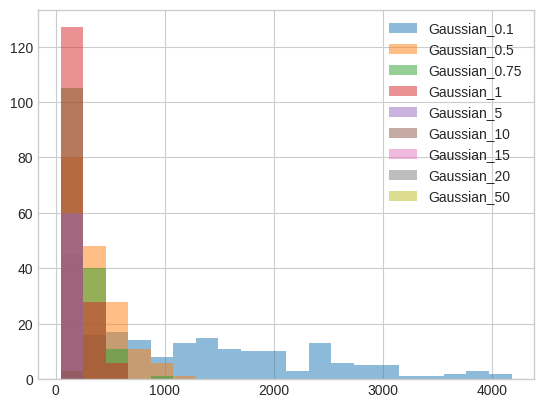

In [24]:
plt.style.use('seaborn-whitegrid')
range_age = [8,17]
delta = 10e-5
real_answers = [count_query(dataset, age) for age in range(range_age[0], range_age[1]+1)]
n = 200
bins = 20
answers = []
epsilon_list = [0.1, 0.5, 0.75, 1, 5, 10, 15, 20, 50]
#[ 0.01, 0.1, 1, 5, 10, 15, 20]
for epsilon in epsilon_list:
  gaussian_answers = [gaussian_vec(range_age, epsilon, delta) for _ in range(n)]
  answers.append(gaussian_answers)
  gaussian_errors = [error_data(real_answers, a)[1] for a in gaussian_answers]
  _, bins, _ = plt.hist(gaussian_errors, bins=bins, label=f'Gaussian_{epsilon}', alpha=0.5)
plt.legend()

> Como se puede apreciar, para un épsilon muy pequeño el error porcentual es demasiado alto, lo que se debe principalmente al hecho de que la cantidad de delitos real por edad para jóvenes menores a 13 años es muy baja siendo en algunos casos solo 1. Por esto se decide cortar el intervalo de edades partiendo por los delitos efectuados por menores desde los 13 años, en vez de partir desde los 8 años ya que el error porcentual de estas edades será muy grande la gran parte de las veces. \\
Además, descartaremos inmediatamente $\epsilon = 0.01$ viendo sus valores en el grafico y separaremos los valores de épsilon restantes en dos gráficos distintos para poder apreciar de mejor manera sus diferencias.

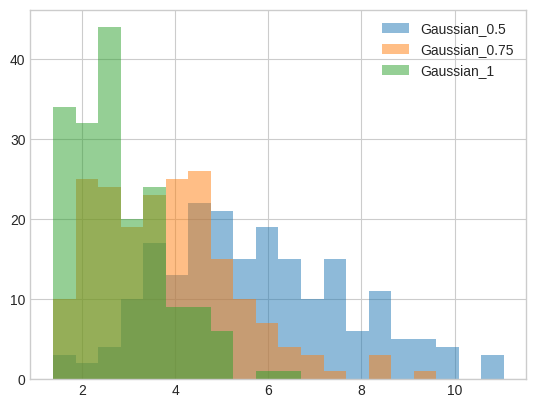

In [25]:
#cantidad de edades desde los 8 años que no serian publicadas(en este caso se limita el rango a [13,17])
c = 5
bins = 20
i = 0
for answer_epsilon in answers[1:4]:
  gaussian_errors = [error_data(real_answers[c:], b[c:])[1] for b in answer_epsilon]
  _, bins, _ = plt.hist(gaussian_errors, bins=bins, label=f'Gaussian_{epsilon_list[1:][i]}', alpha=0.5)
  i = i + 1
plt.legend()

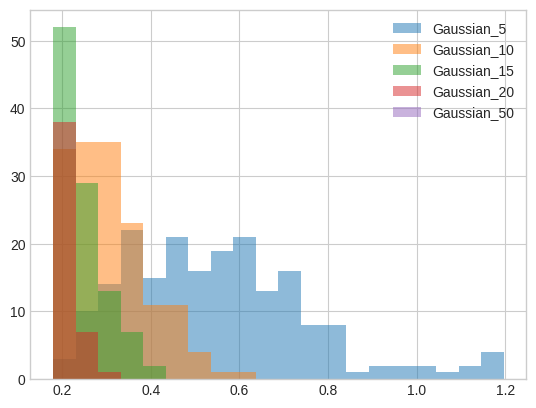

In [26]:
bins = 20
i = 0
for a in answers[4:]:
  gaussian_errors = [error_data(real_answers[c:], b[c:])[1] for b in a]
  _, bins, _ = plt.hist(gaussian_errors, bins=bins, label=f'Gaussian_{epsilon_list[4:][i]}', alpha=0.5)
  i = i + 1
plt.legend()

> Observando los dos gráficos para el rango [13,17], se propone un epsilon de 1 como el epsilon óptimo, pues en este caso el máximo error porcentual observado está alrededor del 6% lo cual se considera lo suficientemente útil para este tipo de consulta. Otra buena opción en términos de utilidad hubiera sido el $\epsilon = 5$, ya que en este caso el error absoluto promedio no suele sobrepasar el 1% siendo más útil que el caso anterior, pero tomando en cuenta que estaríamos ocupando 5 veces más presupuesto de privacidad se optó por la opción más privada ($\epsilon$ = 1).

> Finalizando estos 3 análisis, el epsilon total requerido, y por lo tanto el budget de privacidad usado, fue igual a 3, pues para las 3 consultas epsilon = 1 es el valor óptimo que entrega suficiente presición.

## P6 (3 puntos)

Escriba una breve conclusión que resuma su experiencia trabajando con su dataset, indicando dificultades y sus decisiones clave.

> Una dificultad que presentó nuestro dataset fue el tener pocos atributos de tipo numéricos útiles: solo contamos con la fecha de arresto y edad, ya que el valor del ZIP para ser publicado debe ser generalizado a tal punto que es igual para cada fila, por lo que no consideramos dicho valor. Esto hizo que pensar en consultas interesantes que utilizaran distintos mecanismos fuera difícil. En esta misma línea, el tamaño del dataset en general fue algo que resultó complicar el trabajo realizado. Debido a la relativa poca cantidad de individuos presentes en el dataset, se tuvieron que realizar ciertas decisiones para lograr encontrar un balance adecuado entre privacidad y utilidad. Un ejemplo contreto de esto es la consulta que crimenes por rango etario, donde la poca cantidad de ejemplos para edades más bajas hizo que se agregara demasiado ruido a los datos, afectando de manera significativa la utilidad. Por ello se decidió trabajar con un rango más acotado con más ejemplos para lograr el buen trade-off.

> Otra dificultad que se nos presentó fue el usar o no Clipping en la consulta que buscaba el promedio del dataset, esto debido a que el máximo de edad ya era conocido, pero decidimos aún así utilizar Clipping para poder usar el método de composición secuencial, ya que el resultado sería de todas maneras útil. Otra desición clave que tomamos fueron los atributos que no usaríamos: Race por tener solo 2 posibles valores, ZIP Code por lo anteriormente mencionado y Disposition Description por razones similares a Race, ya que contaba con muy pocos valores únicos.

> En general, se puede concluir que a pesar de las dificultades anteriormente mencionadas, se logró tener buena experiencia trabajando con el dataset, logrando implementar 3 consultas diferencialmente privadas interesantes, que posteriormente fueron analizadas teniendo en cuenta el tradeoff entre privacidad y utilidad para lograr sacarle provecho a los datos y aún así protegerlos.